### **Bubble Sort Introduction**

Bubble sort is a basic sorting algorithm that repeatedly steps through a list, comparing adjacent elements and swapping them based on the sorting criteria.

The algorithm moves elements toward their correct positions, either at the beginning or end of the list.

A list is considered sorted if, for every element e at positions 1 through
N:
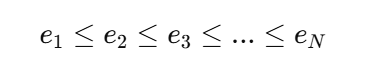

where N is the total number of elements.

For example, bubble sort transforms an unsorted list:
[9, 2, 3, 4, 1]

into sorted order:
[1, 2, 3, 4, 9]

#### <b>How Bubble Sort Works</b>
The algorithm uses two loops:

- The outer loop runs until the list is fully sorted. Initially, we assume the list is unsorted.

- The inner loop iterates through the list, comparing adjacent elements.

<b>At each step, the algorithm checks:</b>
- If the first element is greater than the second, it swaps their positions.
- The larger element moves toward the end of the list.
- If a swap occurs, the list remains unsorted, requiring another outer loop iteration.

This process continues until the largest elements "bubble up" to their correct positions, and no swaps are needed in a full pass, indicating that the list is sorted.

#### **Swapping Elements in Bubble Sort**
When swapping two elements in a list, we must ensure that we don’t overwrite one value before using it in the swap.

If we naively write:

list[index_1] = list[index_2]  
list[index_2] = list[index_1]  

we lose the original value at index_1, as both positions end up with the same value.

<b>Using a Temporary Variable</b>

To avoid this, many programming languages use a temporary variable:

temp = list[index_1]  
list[index_1] = list[index_2]  
list[index_2] = temp  

Here, temp stores the value at index_1, allowing us to safely swap the elements.

<b>Using Multiple Assignment (Pythonic Way)</b>

Python provides a more concise way to swap values without an extra variable:

list[index_1], list[index_2] = list[index_2], list[index_1]  

This technique, called tuple unpacking, simultaneously swaps values in a single line. This approach is both efficient and readable, making it the preferred method in Python.

#### **Algorithm Analysis of Bubble Sort**  

Bubble sort requires multiple passes through the list to ensure all elements are sorted. During each pass, the largest unsorted element is moved to its correct position.  

**Number of Comparisons**  
- The **inner loop** performs (n-1) comparisons on the first pass, (n-2) on the second, and so on.  
- The **outer loop** runs (n) times in the worst case.  

**Worst-Case Scenario**  
In the worst case (a fully reversed list), each pass requires:  
[(n-1) + (n-2) + (n-3) + ... + 2 + 1]

Using the formula for the sum of the first n-1 integers:  
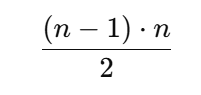

This results in a time complexity of:  
[O(n^2)]

**Best-Case Scenario**  
If the list is already sorted, an optimized version of bubble sort can stop early if no swaps occur. In this case, it makes only one pass, giving a best-case time complexity of:  [O(n)]  

**Average-Case Complexity**  
On average, bubble sort still performs **O(n^2)** comparisons and swaps, making it inefficient for large datasets.

**Space Complexity**  
Bubble sort sorts in place, meaning it does not require extra memory apart from a few variables:  [O(1)]

**Conclusion**  
Due to its **quadratic time complexity**, bubble sort is inefficient for large lists. It is mainly used for educational purposes to demonstrate sorting concepts.


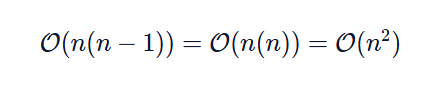

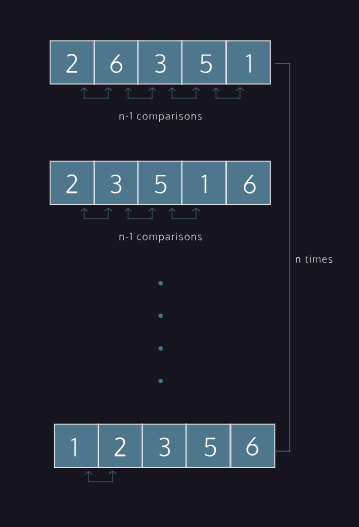

### <b>Bubble Sort using lists/array</b>

Swapping is essential. Let's build that first

In [10]:
# Let's see how swap takes place in a non pythonic way

def swap(numbers, index1, index2):
    temp = numbers[index1]  # Storing the value at index1 in numbers list to the temporary variable
    numbers[index1] = numbers[index2]  # Storing the value at index2 at index1
    numbers[index2] = temp  # Storing value at index1 at index2 via temp variable


# And its done. Let's check

nums = [3, 2, 9, 7, 12, 8, 3, 1, 14]
swap(nums, 3, 7)  # Swapping value at position 3 with 7th position
print(nums)

[3, 2, 9, 1, 12, 8, 3, 7, 14]


In [11]:
# Now that we know swapping, let's do the sorting

def bubble_sort(numbers):
    iteration = 0
    for index in range(len(numbers)-1):   # Looping till the second last position as we need to compare the element with the next in the list
        if numbers[index] > numbers[index+1]:   # Checking if the element is larger than the next then swap
            swap(numbers, index, index+1)
        iteration += 1

    print('Number of iterations done : ', iteration)

In [12]:
nums = [3, 2, 9, 7, 12, 8, 3, 1, 14]
bubble_sort(nums)
print(nums)

Number of iterations done :  8
[2, 3, 7, 9, 8, 3, 1, 12, 14]


The list remains unsorted after one pass, with only the second-largest element (12) in place. With 9 elements, the algorithm requires 8 iterations (n-1). To fully sort the list, the loop must run for all elements that is 9 times. Let's see -

In [13]:
def bubble_sort(numbers):
    iteration = 0
    for elements in numbers:
      for index in range(len(numbers)-1):
          if numbers[index] > numbers[index+1]:
              swap(numbers, index, index+1)
          iteration += 1

    print('Number of iterations done : ', iteration)

In [14]:
nums = [3, 2, 9, 7, 12, 8, 3, 1, 14]
bubble_sort(nums)
print(nums)

Number of iterations done :  72
[1, 2, 3, 3, 7, 8, 9, 12, 14]


So the list is now fully sorted but the number of iterations is 72 that is outer loop ran for 9 times and for each outer loop, inner loop ran for 8 times - (n * (n-1)) = 9*8 = 72.

**Optimizing Bubble Sort**  

Bubble Sort makes unnecessary comparisons in above iterations. Once the largest element is placed, it doesn't need further checks.  

**Optimization Approach**  
- In the first pass, we make (n-1) comparisons.  
- In the second pass, we make (n-2) comparisons, and so on.  
- The total number of comparisons is:  

  (n-1) + (n-2) + ... + 2 + 1 = (n^2 - n)/2
  
- Though fewer than (n^2-n) comparisons, the **O(N²) complexity remains** since lower-order terms are insignificant as N tends to infinity.  

**Optimized Implementation**  
Instead of always making **n(n-1)** comparisons, an optimized version stops early if no swaps occur in a pass, meaning the list is already sorted.  

Let's now compare iterations between the standard and optimized versions using **parallel assignment** in Python!

In [15]:
def bubble_sort_unoptimized(numbers):
    iteration = 0
    for i in range(len(numbers)):
        for idx in range(len(numbers) - 1):
            iteration += 1
            if numbers[idx] > numbers[idx + 1]:
                numbers[idx], numbers[idx + 1] = numbers[idx + 1], numbers[idx]

    print("UNOPTIMIZED ITERATION COUNT: {}".format(iteration))


def bubble_sort_optimized(numbers):
    iteration = 0
    for i in range(len(numbers)):
        for idx in range(len(numbers) - i - 1):   # Reducing by i since the list is sorted by i number of places - a small change
            iteration += 1
            if numbers[idx] > numbers[idx + 1]:
                numbers[idx], numbers[idx + 1] = numbers[idx + 1], numbers[idx]

    print("OPTIMIZED ITERATION COUNT: {}".format(iteration))


nums = [3, 2, 9, 7, 12, 8, 3, 1, 14]
bubble_sort_unoptimized(nums.copy())
bubble_sort_optimized(nums.copy())
print(nums)

UNOPTIMIZED ITERATION COUNT: 72
OPTIMIZED ITERATION COUNT: 36
[3, 2, 9, 7, 12, 8, 3, 1, 14]


So, the number of iterations is now halved! Though the Big O remains the same. Now let's check the time taken by using huge numbers in the list -

In [16]:
import random
import time


# Randomly generating 1000 numbers between 0 and 100
numbers = []
for _ in range(10000):
  numbers.append(random.randint(0, 100))

len(numbers), numbers[:5]

(10000, [32, 40, 68, 25, 86])

In [17]:
# Let's try sorting the list and see the time it takes in bubble sort

start_time = time.time()
bubble_sort_optimized(numbers)
end_time = time.time()

OPTIMIZED ITERATION COUNT: 49995000


In [18]:
time_taken = end_time - start_time
print("Time taken: {:.6f} seconds".format(time_taken))

Time taken: 9.029387 seconds


### **Bubble Sort using Linked Lists Data Structure**

Since everything about Bubble sort is already explained, let's get started with the implementation -

(NOTE - Linked List structure is not preferred for Bubble sort because in worst case it will go to Big O (N^3))

In [19]:
class Node:
    def __init__(self, next_node = None, prev_node = None):
        self.next_node = next_node
        self.prev_node = prev_node


    def set_value(self, value):
        self.value = value

    def get_value(self):
        return self.value


    def set_next_node(self, new_node):
        self.next_node = new_node


    def set_prev_node(self, new_node):
        self.prev_node = new_node


    def get_next_node(self):
        return self.next_node


    def get_prev_node(self):
        return self.prev_node

In [23]:
class Number_List():
    def __init__(self):
      self.head = None
      self.tail = None


    def add_node_at_head(self, value):
      new_node = Node()
      new_node.set_value(value)

      pointer = self.head
      if pointer is None:
        self.head = new_node
        self.tail = new_node
      else:
        pointer.set_prev_node(new_node)
        new_node.set_next_node(pointer)
        self.head = new_node


    def print_list(self):
      pointer = self.head
      while pointer is not None:
        print(pointer.get_value(), end = '\t')
        pointer = pointer.get_next_node()

In [32]:
numbers = Number_List()
for _ in range(10):
  numbers.add_node_at_head(random.randint(0, 100))

In [33]:
numbers.print_list()

64	57	25	49	97	2	51	2	46	23	

In [34]:
def bubble_sort_linked_list(numbers):
    pointer = numbers.head  # Setting a pointer at the start
    size = 0

    # Getting the size of the list
    while pointer is not None:
      size += 1
      pointer = pointer.get_next_node()

    iterations = 0

    # Sorting starts here
    for i in range(size):
      pointer = numbers.head
      for idx in range(size - i - 1):
        if pointer.get_value() > pointer.get_next_node().get_value():  # Checking the value at which pointer is located - if its less or greater than the next node value
          temporary = pointer.get_value()   # store the value at the pointer in a temp variable
          pointer.set_value(pointer.get_next_node().get_value())  # Set the value of the pointer with the value of the next node
          pointer.get_next_node().set_value(temporary)  # Set the next node with the value at the temp variable
        pointer = pointer.get_next_node()   # Move the pointer to the next node
        iterations += 1

    print('NUMBER OF ITERATIONS : ', iterations)

In [35]:
bubble_sort_linked_list(numbers)

NUMBER OF ITERATIONS :  45


In [36]:
numbers.print_list()

2	2	23	25	46	49	51	57	64	97	

In [38]:
numbers = [64,57,25,49,97,2,51,2,46,23]
bubble_sort_optimized(numbers)

OPTIMIZED ITERATION COUNT: 45


So the number of iterations required in list format and linked list format are the same. Let's check the time of run in case of linked list structure -

In [39]:
numbers = Number_List()
for _ in range(10000):
  numbers.add_node_at_head(random.randint(0, 100))


In [40]:
start_time = time.time()
bubble_sort_linked_list(numbers)
end_time = time.time()

time_taken = end_time - start_time
print("Time taken: {:.6f} seconds".format(time_taken))

NUMBER OF ITERATIONS :  49995000
Time taken: 20.931822 seconds


The linked list structure took longer compared to the list format. Bubble Sort is significantly slower on linked lists because of sequential access, pointer manipulation, and poor cache performance. Python lists (arrays) allow fast element swaps and better memory efficiency, making them the preferred choice for sorting operations.

Have you heard of NumPy and how fast it is? Let's see -

In [54]:
import numpy as np

numbers = []
for _ in range(10000):
  numbers.append(random.randint(0, 100))

numbers = np.array(numbers)
print('Before Sorting : ', numbers[170:180])


start_time = time.time()
numbers = np.sort(numbers)
end_time = time.time()

print('After Sorting : ', numbers[170:180])

time_taken = end_time - start_time
print("Time taken: {:.6f} seconds".format(time_taken))

Before Sorting :  [33 90 86 28 33  8  8 81  9 33]
After Sorting :  [1 1 1 1 1 1 1 2 2 2]
Time taken: 0.000317 seconds


Numpy is blazing fast! NumPy is optimized for performance because it uses contiguous memory storage, vectorized operations, and low-level optimizations in C. Unlike Python lists, which store elements as objects with overhead, NumPy arrays store data efficiently, enabling faster computations.